# Stroke Prediction

## Introduction

Cerebral stroke has become a significant global public health issue in recent years. The ideal solution to this concern is to prevent in advance by controlling related metabolic factors. However, it is difficult for medical staff to decide whether special precautions are needed for a potential patient only based on the monitoring of physiological indicators unless they are obviously abnormal. 

 In this study, we attempt to predict stroke based on a dataset only including physiological
indicators, such as age, hyper tension and blood glucose level,heart disease,etc.And we are using  classification models to predict at maximum accuracy.


source of dataset:kaggle/healthcare/stroke-prediction-data.

## Feature Description

|Feature|Description|
|---|---|
|1.id                       |Patient ID|
|2.gender                   |Gender of Patient|
|3.age                      |Age of Patient|
|4.hypertension             |0:No Hypertension,1:Suffering from Hypertension|
|5.heart_disease            |0:No Heart Disease,1:Suffering from Heart Disease|
|6.ever_married             |Yes/No|
|7.work_type                |Type of Occupation|
|8.Residence_type           |Area type of Residence(Urban/Rural)|
|9.avg_glucose_level       | Average Glucose level (measured after meal)|
|10.bmi                     |Body Mass Index|
|11.smoking_status         | Patient's Smoking status|
|12.stroke                  |0:No Stroke,1:Suffered Stroke|

In [1]:
# Importing Numpy as np
import numpy as np
# Importing pandas as pd
import pandas as pd
#Importing Matplotlibrary's PyPlot as plt
import matplotlib.pyplot as plt
# Importing seaborn as sns
import seaborn as sns

In [2]:
# Read the stroke data
pd.set_option('display.max_columns', None)
df=pd.read_csv(r'C:\Users\SHEMI.DESKTOP-LJACJ0V\Desktop\Jupyter Notebook\healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#let's check the size of our data
df.shape

(5110, 12)

In [4]:
df.describe(include = 'all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Feature Reduction

In [6]:
# Droping id column which has low feature importance
df=df.drop('id',axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Handling Missing values

In [7]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

* **There are missing values in Body Mass Index column.**

Text(0.5, 1.0, 'Distribution of BMI')

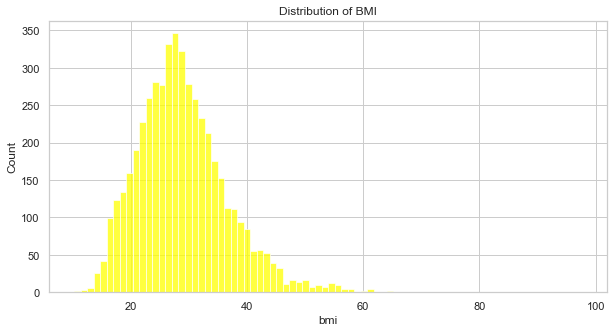

In [8]:
# Plotting BMI column for understanding the distribution
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
ax=sns.histplot(df.bmi,color='yellow')
plt.title('Distribution of BMI',fontsize=12)

* **The disribution is Normal ,so we can fill missing values with mean of BMI.**

In [9]:
# Handling missing values with mean of BMI column
df['bmi']=df['bmi'].fillna(df['bmi'].mean())
import warnings
warnings.filterwarnings("ignore")

In [10]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
# Now there is no null values in the feature set 

In [12]:
# Displaying the Object type features
dtypes=df.dtypes.to_frame('Data type')
dtypes.reset_index(level=0, inplace=True)
dtypes.rename(columns = {'index':'Feature'}, inplace = True)
dtypes[dtypes['Data type'] == 'object']

,Feature,Data type
0,gender,object
4,ever_married,object
5,work_type,object
6,Residence_type,object
9,smoking_status,object


* **There are 5 Non-numeric features in  data frame.**

### Encoding

**Label encoding**

In [14]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()

categorical_col=['gender','ever_married','Residence_type','work_type','smoking_status']
for i in categorical_col:
    df[i] = label_en.fit_transform(df[i])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


## Preparing the Data

In [16]:
# Extract feature columns
df_features = list(df.columns[:-1])

In [17]:
# Extract target column 
df_target = df.columns[-1]

In [18]:
# Separate the data into feature data and target data (X and y, respectively)
X = df[df_features]
y = df[df_target]

### min-Max scaling

In [19]:
# performing standard scaling using sklearn
from sklearn import preprocessing

min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
X=min_max.fit_transform(X)
X=pd.DataFrame(X)
X.describe()


,0,1,2,3,4,5,6,7,8,9
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.207143,0.526692,0.097456,0.054012,0.656164,0.541928,0.508023,0.235563,0.212981,0.458969
std,0.246522,0.276033,0.296607,0.226063,0.475034,0.272573,0.499985,0.209046,0.088179,0.357178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.304199,0.000000,0.000000,0.000000,0.500000,0.000000,0.102137,0.154639,0.000000
50%,0.000000,0.548340,0.000000,0.000000,1.000000,0.500000,1.000000,0.169721,0.207331,0.666667
75%,0.500000,0.743652,0.000000,0.000000,1.000000,0.750000,1.000000,0.272228,0.257732,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Exploratory Data Analysis(EDA)

It looks like the all the field have some relation with the stroke, we'll try to analyze as much columns as we can before we go for prediction.

### Gender impact on Stroke

In [13]:
#check the gender influence on stroke
gender_df = pd.DataFrame(df.gender.value_counts()).reset_index().rename(columns = {"index":"Gender", "gender":"count_of_gender"})
gender_df

,Gender,count_of_gender
0,Female,2994
1,Male,2115
2,Other,1


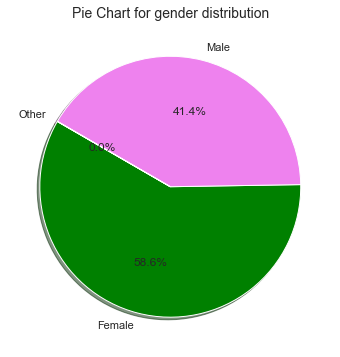

In [14]:
#Pie Chart of type of gender
sns.color_palette("hls", 8)
type_counts = df.gender.value_counts()
pie, ax = plt.subplots(figsize=[8,6])
plt.pie(type_counts, labels = type_counts.index,startangle=150, autopct="%1.1f%%", shadow=True, explode=None, colors = ['Green','violet', 'orange'])
plt.title("Pie Chart for gender distribution", fontsize=14);

**Insight**: We can see that the records provided shows that more number of Female had stroke than men.

### Patient's Background

Text(0.5, 1.0, 'Distribution of Residence type')

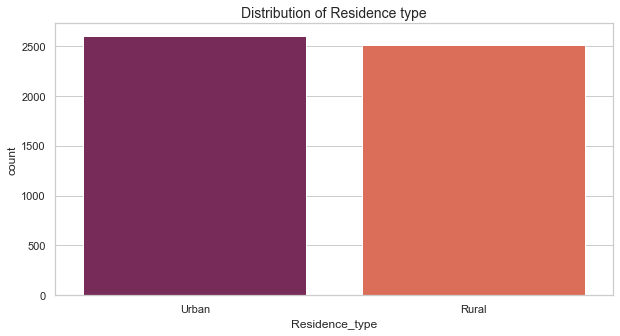

In [15]:
# Plotting contplot of Residence type
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
ax=sns.countplot(x=df.Residence_type,palette='rocket')
plt.title('Distribution of Residence type',fontsize=14)

**Insight**: More patients are frome Urban area.

### Age Groups having strokes

Text(0.5, 1.0, 'Top 10 age groups having strokes')

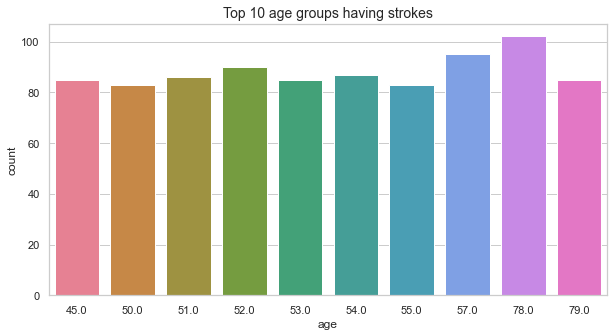

In [16]:
# Calculating the counts and sorting on age column
age_count = df.age.value_counts().sort_values(ascending=False)
# plotting the top 10 age groups had more strokes
age_df = pd.DataFrame(age_count.iloc[:10]).reset_index().rename(columns = {"index":"age","age":"count"})
plt.figure(figsize=(10,5))
sns.barplot(x="age", y="count",data = age_df,palette='husl')
plt.title("Top 10 age groups having strokes",fontsize=14)

**Insight**: The age bracket between 77-79 has the most number of strokes.

### Smoking types and  heart disease vs Stroke

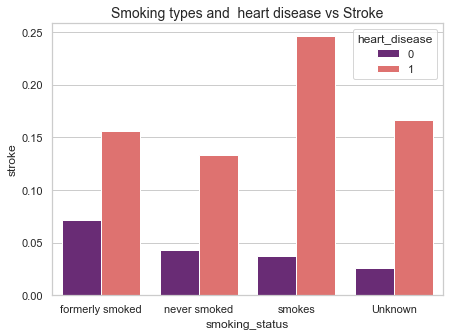

In [17]:
# plotting Barplot of Smoking types and  heart disease vs Stroke
plt.figure(figsize=(7,5))

plt.title("Smoking types and  heart disease vs Stroke",fontsize=14)
ax = sns.barplot(x='smoking_status', y='stroke', hue='heart_disease', data=df, ci=None,palette='magma')

**Insight**: The graph shows that smokers suffering from Heart disease have stroke than the rest.

### work types and hypertension vs Stroke

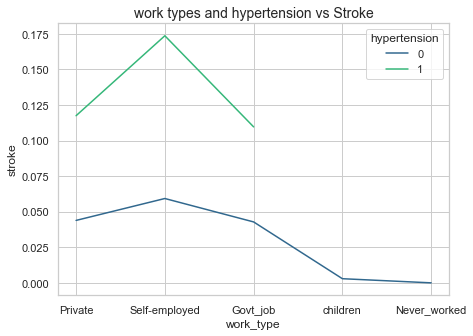

In [18]:
# plotting line plot of work types and hypertension vs Stroke
plt.figure(figsize=(7,5))

plt.title("work types and hypertension vs Stroke",fontsize=14)
ax = sns.lineplot(x='work_type', y='stroke', hue='hypertension', palette='viridis', data=df, ci=None)

**Insight**: The self-employed workers are found to be most suffering from Hyper tension have stroke and there's a larege quantity of hypertension that's unknown so it can be higher than what we have.

### Distribution of Numerical variables

<function matplotlib.pyplot.show(close=None, block=None)>

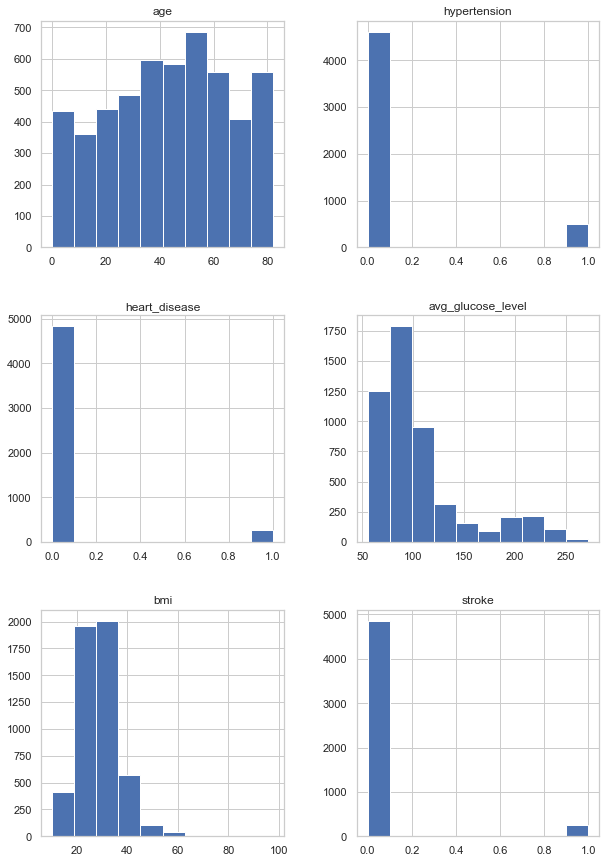

In [19]:
# Plotting  to understand the distribution of features
freqgraph=df.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(10,15))
plt.show

**Insight**: From the graph we can see that,bmi and age are normally distributed and avg_glucose_level is skewed.

## Modelling

In [33]:
# Checking the correlation of features
corr_matrix = df.corr()
corr_matrix


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


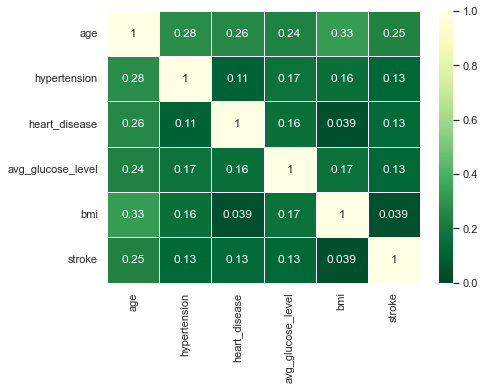

In [34]:
# Plotting heatmap
plt.figure(figsize=(7,5))
ax = sns.heatmap(corr_matrix, vmin=0, vmax=1, linewidths=.5,annot=True, cmap='YlGn_r')


**Insight**: The heatmap shows that the columns are weekly correlated with each other and only few columns have strong correlation such as age and bmi, age and hypertension, age and heart disease, age and stroke etc.

### Implementation: Training and Testing Data Split

next step, we split the data (both features and corresponding labels) into training and test sets

In [20]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size = 0.2405063291, random_state=42)

 There are 17 classes of supervised learning models available in Scikit-Learn (Ver.1.0.2) at the time of creation of this notebook. Out of them we selected 4 Models which are best suited for our data.


### 1. Support Vector Machine

“Support Vector Machine” (SVM) is a supervised machine learning algorithm that can be used for both classification or regression challenges.In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well .


### 2. Logistic Regression

Logistic regression is a classification algorithm used to find the probability of event success and event failure. It is used when the dependent variable is binary(0/1, True/False, Yes/No) in nature. It supports categorizing data into discrete classes by studying the relationship from a given set of labelled data.


### 3. K-NN

K- Nearest Neighbors or also known as K-NN belong to the family of supervised machine learning algorithms which means we use labeled (Target Variable) dataset to predict the class of new data point. The K-NN algorithm is a robust classifier which is often used as a benchmark for more complex classifiers such as Artificial Neural Network (ANN) or Support vector machine (SVM).


### 4. Random Forest

Random forest algorithm is suitable for both classifications and regression task.It gives a higher accuracy through cross validation.Random forest classifier can handle the missing values and maintain the accuracy of a large proportion of data.If there are more trees, it doesn’t allow over-fitting trees in the model.It has the ability to work upon a large data set with higher dimensionality.

## Model Application

In [21]:
# Import the  supervised learning models from sklearn
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC

In [22]:
# fit model-1  on training data

SVCModel = SVC(kernel='rbf') 
SVCModel.fit(X_train, y_train)

SVC()

In [23]:
# predict on the test data
y_pred=SVCModel.predict(X_test)

In [24]:
# Importing confusion_matrix from sklearn.metrics as CM
from sklearn.metrics import confusion_matrix as CM
# Importing classification_report from sklearn.metrics as CR
from sklearn.metrics import classification_report as CR
# Final status of the predictions made by the SV Classifier
print(CR(y_test , y_pred))
print('Confusion matrix of the model is:\n',CM(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1169
           1       0.00      0.00      0.00        60

    accuracy                           0.95      1229
   macro avg       0.48      0.50      0.49      1229
weighted avg       0.90      0.95      0.93      1229

Confusion matrix of the model is:
 [[1169    0]
 [  60    0]]


In [25]:
# calculate the accuracy score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy on training set:', round(SVCModel.score(X_train, y_train),2))
print('Accuracy on test set:', round(accuracy_score(y_test, y_pred),2))
print('Precision score on test set:', round(precision_score(y_test, y_pred, average='macro'),2))
print('Recall score on test set:', round(recall_score(y_test, y_pred, average='macro'),2))
print('F1 score on test set:', round(f1_score(y_test, y_pred, average='macro'),2))

Accuracy on training set: 0.95
Accuracy on test set: 0.95
Precision score on test set: 0.48
Recall score on test set: 0.5
F1 score on test set: 0.49


In [26]:
# fit the model-2 on training data and predict on the test data and measure the accuracy
LRModel = LR(max_iter=3000)
LRModel.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [27]:
# predict on the test data
y_pred=LRModel.predict(X_test)

In [28]:
# Final status of the predictions made by the Logistic Regression Classifier
print(CR(y_test , y_pred))
print('Confusion matrix of the model is:\n',CM(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1169
           1       0.00      0.00      0.00        60

    accuracy                           0.95      1229
   macro avg       0.48      0.50      0.49      1229
weighted avg       0.90      0.95      0.93      1229

Confusion matrix of the model is:
 [[1169    0]
 [  60    0]]


In [29]:
# calculate the accuracy score
print('Accuracy on training set:', round(LRModel.score(X_train, y_train),2))
print('Accuracy on test set:', round(accuracy_score(y_test, y_pred),2))
print('Precision score on test set:', round(precision_score(y_test, y_pred, average='macro'),2))
print('Recall score on test set:', round(recall_score(y_test, y_pred, average='macro'),2))
print('F1 score on test set:', round(f1_score(y_test, y_pred, average='macro'),2))

Accuracy on training set: 0.95
Accuracy on test set: 0.95
Precision score on test set: 0.48
Recall score on test set: 0.5
F1 score on test set: 0.49


In [30]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy
# Checking for optimal n_neighbour value
# Importing KNeighborsClassifier from sklearn.neighbors as KNC
Accuracy_range=[]
N_range=np.arange(4,20)
for i in N_range:
    KModel=KNC(n_neighbors=i)
    KModel.fit(X_train,y_train)
    y_pred=KModel.predict(X_test)
    Accuracy_range.append(accuracy_score(y_test,y_pred))
    
print(Accuracy_range)

[0.9479251423921887, 0.9454841334418226, 0.951179820992677, 0.950366151342555, 0.951179820992677, 0.951179820992677, 0.951179820992677, 0.951179820992677, 0.951179820992677, 0.951179820992677, 0.951179820992677, 0.951179820992677, 0.951179820992677, 0.951179820992677, 0.951179820992677, 0.951179820992677]


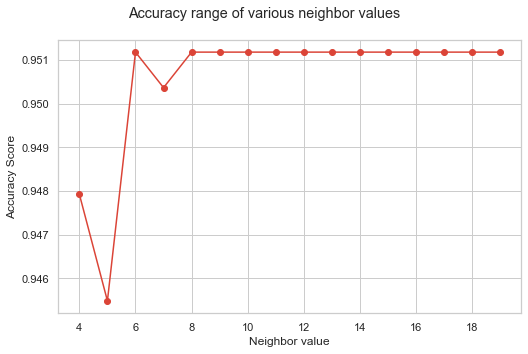

In [31]:
f, ac = plt.subplots(figsize=(7.5, 5))
f.suptitle('Accuracy range of various neighbor values')
sns.set_theme()
plt.plot( N_range, Accuracy_range, marker='o', color='#DB4437')
plt.xlabel('Neighbor value')
plt.ylabel('Accuracy Score')
f.tight_layout()
plt.show()


Selecting optimal neighbor value as '6'

In [32]:
KNCModel=KNC(n_neighbors=5)
KNCModel.fit(X_train,y_train)

KNeighborsClassifier()

In [33]:
# predict on the test data
y_pred=KNCModel.predict(X_test)

In [34]:
# Final status of the predictions made by the KNN Classifier
print(CR(y_test , y_pred))
print('Confusion matrix of the model is:\n',CM(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1169
           1       0.11      0.02      0.03        60

    accuracy                           0.95      1229
   macro avg       0.53      0.50      0.50      1229
weighted avg       0.91      0.95      0.93      1229

Confusion matrix of the model is:
 [[1161    8]
 [  59    1]]


In [35]:
# calculate the accuracy score
print('Accuracy on training set:', round(KNCModel.score(X_train, y_train),2))
print('Accuracy on test set:', round(accuracy_score(y_test, y_pred),2))
print('Precision score on test set:', round(precision_score(y_test, y_pred, average='macro'),2))
print('Recall score on test set:', round(recall_score(y_test, y_pred, average='macro'),2))
print('F1 score on test set:', round(f1_score(y_test, y_pred, average='macro'),2))

Accuracy on training set: 0.95
Accuracy on test set: 0.95
Precision score on test set: 0.53
Recall score on test set: 0.5
F1 score on test set: 0.5


In [36]:
# fit the model-4 on traning data and predict on the test data and measure the accuracy
RFCModel = RFC(n_estimators=200,max_depth=50,random_state=42,criterion='entropy')
RFCModel.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=200,
                       random_state=42)

In [37]:
# predict on the test data
y_pred=RFCModel.predict(X_test)

In [38]:
# Final status of the predictions made by the Random Forest Classifier
print(CR(y_test , y_pred))
print('Confusion matrix of the model is:\n',CM(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1169
           1       0.20      0.02      0.03        60

    accuracy                           0.95      1229
   macro avg       0.58      0.51      0.50      1229
weighted avg       0.92      0.95      0.93      1229

Confusion matrix of the model is:
 [[1165    4]
 [  59    1]]


In [39]:
# calculate the accuracy score
print('Accuracy on training set:', round(RFCModel.score(X_train, y_train),2))
print('Accuracy on test set:', round(accuracy_score(y_test, y_pred),2))
print('Precision score on test set:', round(precision_score(y_test, y_pred, average='micro'),2))
print('Recall score on test set:', round(recall_score(y_test, y_pred, average='micro'),2))
print('F1 score on test set:', round(f1_score(y_test, y_pred, average='micro'),2))

Accuracy on training set: 1.0
Accuracy on test set: 0.95
Precision score on test set: 0.95
Recall score on test set: 0.95
F1 score on test set: 0.95


### Comparison

|Model  |Accuracy on Training set  |Accuracy on Test set	|Precision score	|Recall score	|F1 score|
|---|---|---|---|---|---|
|SVM|0.95|0.95|0.48|0.5|0.49|
|Logistic Regression	|0.95|0.95|0.48|0.5|0.49|	
|K-NC |0.95|0.95|0.53|0.5|0.5|	
|Random Forest|1.0|0.95|0.95|0.95|0.95|

### Conclusion

## Random Forest Classifier provides best predictions among all other ML Models employed here(according to the the accuracy and f1 scores)Conclusion .We can say that we are getting the best results from Random Forest Classifier , we can try it with different parameters and different training sizes to see a slightly deviated results or more accurate results.

## Fine Tuning

Tuning a classifier for maximum sensitivity or specificity can be achieved in (at least) two main steps. The first is using GridSearchCV to fine tune your model and keep the classifier with the highest recall score. The second step is to adjust the decision threshold using the precision recall curve and the roc curve.
Here we are using GridSearchCV for fine tuning Random Forest Classifier.

### Fine tuning Random Forest Classifier using GridSearchCV

In [45]:
# Importing  GridSearchCV and StratifiedKFold
from sklearn.model_selection import GridSearchCV,StratifiedKFold
RFCmodel = RFC(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}

In [46]:
# Creating a Scorer dictionary
from sklearn.metrics import make_scorer
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [47]:
#  the wrapper function is to quickly reuse the code to fit the best classifier according to the type of scoring metric chosen.
# First trying on precision score
def grid_search_wrapper(refit_score='precision_score'):
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(RFCmodel, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search                   

In [ ]:
grid_search_RFCmodel = grid_search_wrapper(refit_score='precision_score')

In [ ]:
results = pd.DataFrame(grid_search_RFCmodel.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score',
         'param_max_depth', 'param_max_features', 'param_min_samples_split',
         'param_n_estimators']].head()

In [ ]:
# Accuracy score
grid_search_RFCmodel = grid_search_wrapper(refit_score='accuracy_score')

In [ ]:
# Recall score
grid_search_RFCmodel = grid_search_wrapper(refit_score='recall_score')